# Imports

In [41]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%pwd

'/home/hendrix/projects/LanguageModel'

In [2]:
from fastai import *
from fastai.text import *
from fastai.callbacks import *

In [3]:
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""

In [4]:
path = Path('/home/hendrix/data/jhlm/')
df = pd.read_csv(path/'alllessons2.csv')

# Data

In [7]:
df.head()

,text
0,okay so welcome practical deep learning for co...
1,at the top that's right with zero zero here as...
2,Python before so nearly all of you that's grea...
3,really for the book audience not for you that'...
4,interactive experiments and it lets us give yo...


In [8]:
data_lm = (TextList.from_csv(path, 'alllessons2.csv', cols='text')
                .split_by_rand_pct(0.2)
                .label_for_lm()
                .databunch(bs=64))
data_lm.save('jhlm_lm.pkl')

In [9]:
data_lm.show_batch()

idx,text
0,notebook and and then you 're ready to start the real lesson one so if you 're ready you will be able to see something like this and in particular hopefully you have gone to notebook tutorial it 's xxbos at the top that 's right with zero zero here as this grows you 'll see more and more files but will keep a notebook tutorial at the top
1,do so everybody will know that you 're not a real deep learning practitioner because real deep learning practitioners know the keyboard shortcuts and the keyboard shortcut is shift enter xxbos little bit confusing fast xxup ai with no dot is the name of our software and then first dot xxup ai with the dot is the name of our organization so if you go to dark start fast
2,"fit for a while , and i get 99.54 % . xxmaj that 's interesting because we 've trained this literally from scratch with an architecture we built from scratch , i did n't look out this architecture anywhere . xxbos xxmaj it 's just the first thing that came to mind . xxmaj but in terms of where that puts us , 0.45 % error is around about"
3,that when we throw away this activation all of the things that were connected to it are gone too okay for each mini batch we throw away a different subset of activations how many do we throw away we throw them of each one away with a probability p a common value of p is 0.5 so what does that mean and you 'll see in this case xxbos
4,", you would n't want to flip it left right . xxmaj that would change the meaning of it . xxmaj you would n't want to rotate it too much , that would change the meaning of it . xxmaj also because these images are so small , doing zooms and stuff is going to make them so fuzzy as to be unreadable . xxmaj so normally , for"


# Training

## Train 1

In [38]:
learn = language_model_learner(data_lm,AWD_LSTM,
                              path=path,
                              callback_fns=[partial(SaveModelCallback,every='epoch',name='jhlm2'),
                                           ShowGraph]).to_fp16()

In [39]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,0.095794,0.059856,0.987063,15:32
1,0.094807,0.059245,0.987096,15:30
2,0.089952,0.058976,0.987134,15:27


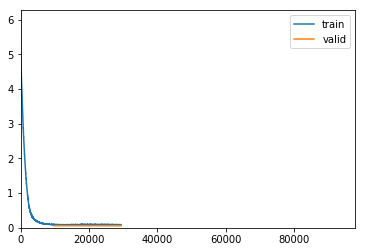

KeyboardInterrupt: 

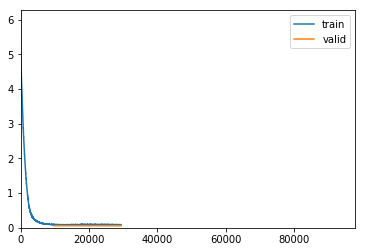

In [40]:
learn.fit_one_cycle(10,1e-2,moms=(.8,.7))

## Train 2

In [45]:
learn = language_model_learner(data_lm,AWD_LSTM,
                              path=path,
                              callback_fns=[partial(SaveModelCallback,every='epoch',name='jhlm3'),
                                           ShowGraph]).to_fp16()

In [46]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,0.093721,0.059935,0.987039,16:00
1,0.096183,0.059269,0.987143,15:43
2,0.092274,0.059001,0.987024,15:33


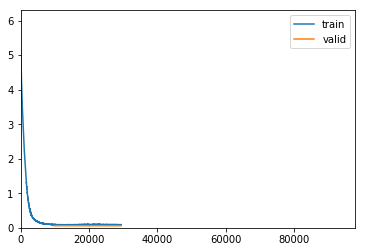

KeyboardInterrupt: 

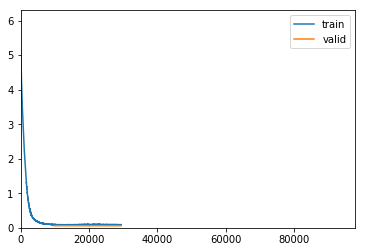

In [47]:
learn.fit_one_cycle(10,1e-2,moms=(.8,.7))

# predict

In [31]:
print(learn.predict('this is really cool',30,temperature=.3))

this is really cool for you to create a data bunch from Google Image Search and created a classifier we 've got one point four percent error rate let 's save


In [37]:
print(learn.predict('this is really cool',30,temperature=.4))

this is really cool for you to do a classification model on pictures that you choose that will work at a world class level you 'll be able to classify text again xxbos "


In [35]:
learn.save('jhlm_test')

In [36]:
learn.load('jhlm_test')

RecursionError: maximum recursion depth exceeded

# End